In [274]:
#%%imports
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from lstein import (
    utils as lsu,
    makedata as md
)
from lstein import lstein
importlib.reload(lstein)


<module 'lstein.lstein' from '/home/lukas/github/LStein/src/lstein/lstein.py'>

### Get Data

In [275]:
#generate some data
raw, pro = md.simulate(opt="sin", theta=np.array([10,15,20,25,30]))
df_raw = pl.from_dict(raw).with_columns(pl.col("amplitude")+2*10) #offset to make work with log10
df_pro = pl.from_dict(pro).with_columns(pl.col("amplitude").abs()+1) #abs + offset to make work with log10
print(df_raw)

shape: (2_500, 5)
┌────────┬────────────┬───────────┬─────────────┬────────────┐
│ period ┆ time       ┆ amplitude ┆ amplitude_e ┆ processing │
│ ---    ┆ ---        ┆ ---       ┆ ---         ┆ ---        │
│ i64    ┆ f64        ┆ f64       ┆ f64         ┆ str        │
╞════════╪════════════╪═══════════╪═════════════╪════════════╡
│ 10     ┆ -50.0      ┆ 20.354605 ┆ NaN         ┆ raw        │
│ 10     ┆ -50.0      ┆ 19.633525 ┆ NaN         ┆ raw        │
│ 10     ┆ -49.699399 ┆ 20.309746 ┆ NaN         ┆ raw        │
│ 10     ┆ -49.098196 ┆ 20.465183 ┆ NaN         ┆ raw        │
│ 10     ┆ -49.098196 ┆ 20.552217 ┆ NaN         ┆ raw        │
│ …      ┆ …          ┆ …         ┆ …           ┆ …          │
│ 30     ┆ 97.294589  ┆ 21.066345 ┆ NaN         ┆ raw        │
│ 30     ┆ 97.294589  ┆ 20.377976 ┆ NaN         ┆ raw        │
│ 30     ┆ 98.196393  ┆ 20.708449 ┆ NaN         ┆ raw        │
│ 30     ┆ 98.496994  ┆ 21.092807 ┆ NaN         ┆ raw        │
│ 30     ┆ 98.496994  ┆ 21.320386 ┆ N

In [276]:
#get dimensions

##raw
df_raw_p = df_raw.partition_by("period")    #partition by unique values in `"period"`
theta_raw = [df["period"].to_numpy()[0] for df in df_raw_p]    #only one value per series
x_raw = [df["time"].to_numpy() for df in df_raw_p]             #K values per series
y_raw = [df["amplitude"].to_numpy() for df in df_raw_p]        #K values per series

##processed
df_pro_p = df_pro.partition_by("period")    #partition by unique values in `"period"`
theta_pro = [df["period"].to_numpy()[0] for df in df_pro_p]    #only one value per series
x_pro = [df["time"].to_numpy() for df in df_pro_p]             #K values per series
y_pro = [df["amplitude"].to_numpy() for df in df_pro_p]        #K values per series

### Setup Variations

In [277]:
#global parameters
thetaticks = np.array(theta_raw).astype(int)
xticks = np.linspace(1, 80, 6).astype(int)
yticks = np.linspace(1,2,3).astype(float)

thetalabel = r"$\theta$"
xlabel = r"$x$"
ylabel = r"$y$"

#init list of canvases
LSCs = []

In [278]:
#standard
thetaguidelims = (-np.pi/2,np.pi/2)
panelsize = np.pi/10
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=thetaguidelims, thetaplotlims=(thetaguidelims[0]+panelsize/2, thetaguidelims[1]-panelsize/2),
    panelsize=panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
))
#add panels
for i in range(len(theta_raw)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSCs[0].add_panel(
        theta=theta_raw[i], #add panel at `theta_raw[i]`
    )

    #add a series to the panel
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", lw=3)


In [279]:
#log-log-log-scale
theta_s = [np.log10(thetai) for thetai in theta_pro]
x_pro_s = [np.log10(xi) for xi in x_pro]
y_pro_s = [np.log10(yi) for yi in y_pro]
thetaticks_s = np.round(np.log10(thetaticks), 2)
xticks_s = np.round(np.log10(xticks), 2)
yticks_s = np.round(np.log10(yticks), 2)

thetaguidelims = (-np.pi/2,np.pi/2)
panelsize = np.pi/10
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks_s, xticks=xticks_s, yticks=yticks_s,
    thetaguidelims=thetaguidelims, thetaplotlims=(thetaguidelims[0]+panelsize/2, thetaguidelims[1]-panelsize/2),
    panelsize=panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
))

#add panels
for i in range(len(theta_s)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSCs[1].add_panel(
        theta=theta_s[i], #add panel at `theta_s[i]`
    )

    #add a series to the panel
    LSP.plot(x_pro_s[i], y_pro_s[i], seriestype="line", lw=3)


/tmp/ipykernel_81051/310537207.py:3: RuntimeWarning: invalid value encountered in log10
  x_pro_s = [np.log10(xi) for xi in x_pro]


### Display Plot

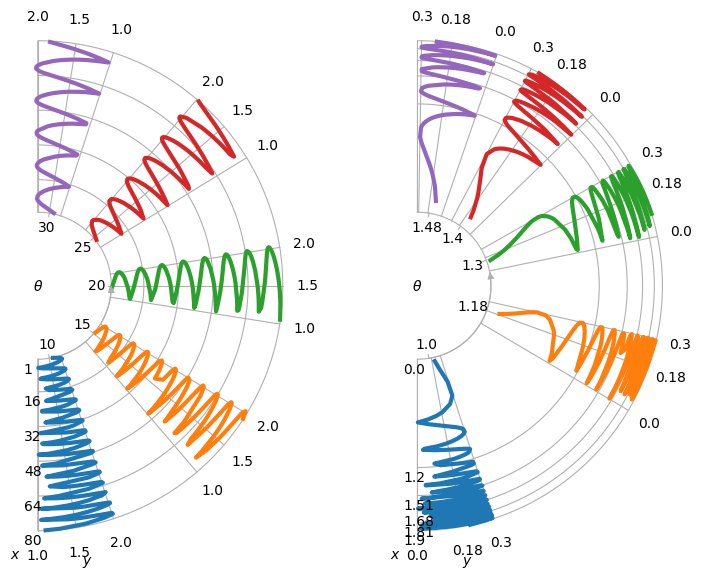

In [280]:
fig, axs = plt.subplots(1,2, figsize=(9,7))
axs = axs.flatten()
for idx in range(len(LSCs)):
    lstein.LSteinMPL(LSCs[idx]).show(axs[idx])
    # fig = lstein.draw(LSC)
plt.show()